# Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score


# Load and preprocess the dataset

In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dataset visualization

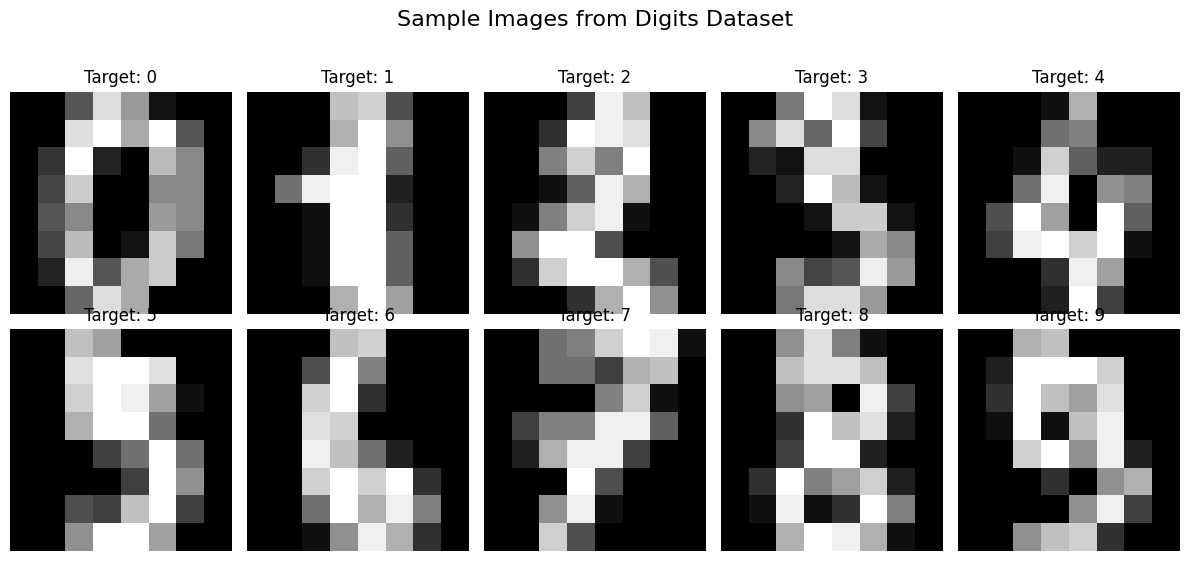

In [ ]:
# Visualize the dataset
plt.figure(figsize=(12, 6))
for i in range(10):  # Display first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(X[i], (8, 8)), cmap='gray')
    plt.title(f'Target: {y[i]}', fontsize=12)
    plt.axis('off')
plt.suptitle("Sample Images from Digits Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create and train pipelines for different models

In [ ]:
# Create pipelines for different algorithms
pipelines = {
    'KMeans': Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_init=10))]),
    'Agglomerative Clustering': Pipeline([('scaler', StandardScaler()), ('agg', AgglomerativeClustering(n_clusters=10))]),
    'Gaussian Mixture': Pipeline([('scaler', StandardScaler()), ('gmm', GaussianMixture(n_components=10))])
}

# Train models and store their adjusted Rand Index (ARI)
ari_scores = {}
for model_name, pipeline in pipelines.items():
    labels = pipeline.fit_predict(X_scaled)
    ari = adjusted_rand_score(y, labels)
    ari_scores[model_name] = ari


# Visualize the results

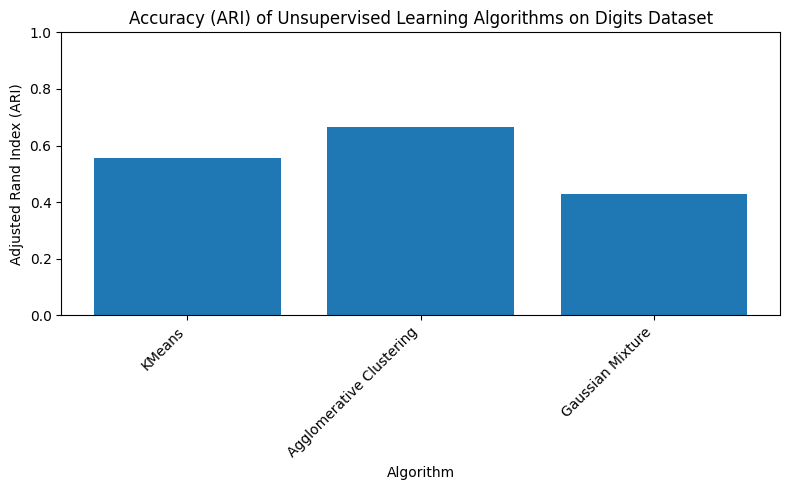

In [ ]:
# Plot the ARI scores
plt.figure(figsize=(8, 5))
plt.bar(ari_scores.keys(), ari_scores.values())
plt.ylim(0, 1)
plt.xlabel('Algorithm')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Accuracy (ARI) of Unsupervised Learning Algorithms on Digits Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
